In [53]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from scipy import signal
from scipy.io import wavfile
from IPython.display import Audio

In [54]:
file_path = "C:/Users/Piotr/Desktop/f1_script1_cleanraw.wav"

load_sample_rate = 16000

# Second method parameters
fft_size = 2048
window_size = fft_size
hop_size = window_size


In [55]:
data, sample_rate = librosa.load(file_path, sr = load_sample_rate)

start_time = 10
end_time = 15

start_sample = int(start_time * sample_rate)
end_sample = int(end_time * sample_rate)

data = data[start_sample:end_sample]

Audio(data = data, rate = sample_rate)

In [56]:
frequencies, times, spectrogram1 = signal.spectrogram(data, sample_rate)

In [57]:
stft = librosa.stft(
        data,
        n_fft = fft_size,
        hop_length = hop_size,
        win_length = window_size,
        center = False
    )
spectrogram2 = np.abs(stft)
spectrogram2_db = librosa.amplitude_to_db(spectrogram2, ref = np.max)


In [58]:
mel_spectrogram = librosa.feature.melspectrogram(y = data, sr = sample_rate)
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref = np.max)

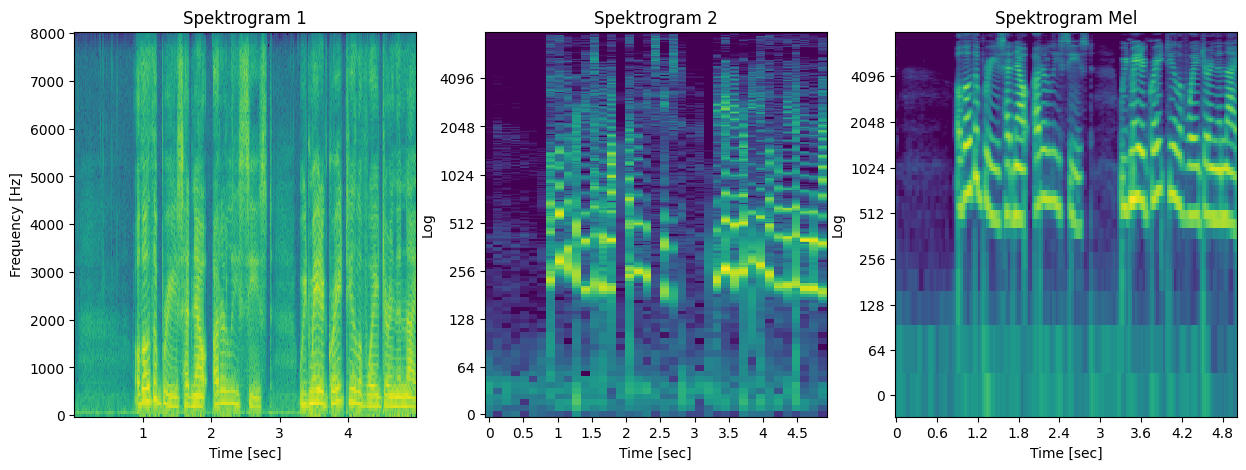

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

im1 = axes[0].pcolormesh(times, frequencies, np.log(spectrogram1), cmap='viridis')
axes[0].set_title("Spektrogram 1")
axes[0].set_xlabel("Time [sec]")
axes[0].set_ylabel("Frequency [Hz]")

librosa.display.specshow(spectrogram2_db, ax = axes[1], y_axis = "log", x_axis = "time", sr = sample_rate, hop_length = hop_size, win_length = window_size, n_fft = fft_size, cmap = 'viridis')
axes[1].set_title("Spektrogram 2")
axes[1].set_xlabel("Time [sec]")
axes[1].set_ylabel("Log")

librosa.display.specshow(mel_spectrogram_db, ax = axes[2], y_axis = "log", x_axis = "time", sr = sample_rate, cmap='viridis')
axes[2].set_title("Spektrogram Mel")
axes[2].set_xlabel("Time [sec]")
axes[2].set_ylabel("Log")

plt.show()

In [60]:
spectrogram1_pcen = librosa.pcen(spectrogram1 * (2**31))
spectrogram2_pcen = librosa.pcen(spectrogram2 * (2**31))
mel_spectrogram_pcen = librosa.pcen(mel_spectrogram * (2**31))

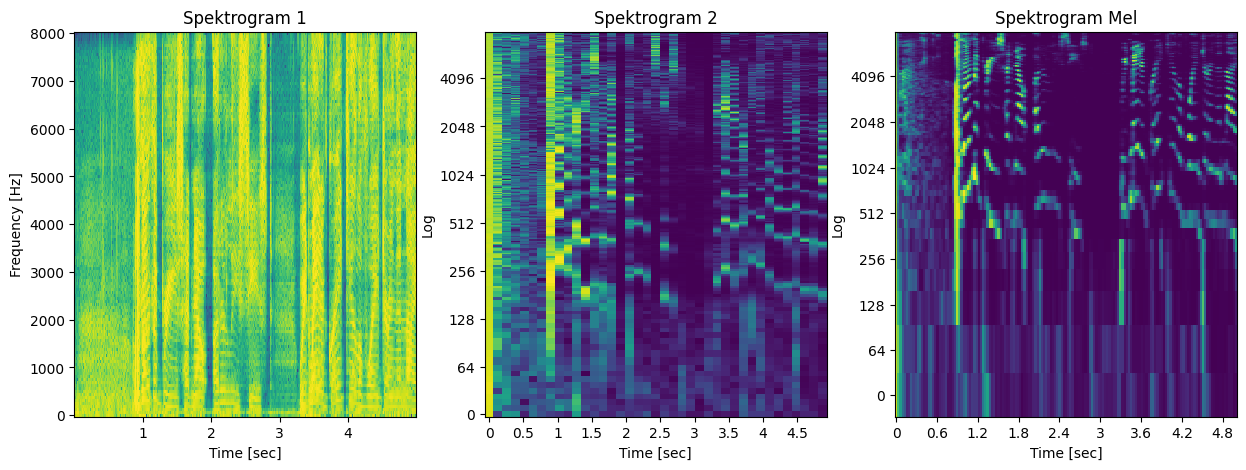

In [61]:
fig2, axes2 = plt.subplots(1, 3, figsize=(15, 5))

axes2[0].pcolormesh(times, frequencies, np.log(spectrogram1_pcen), cmap='viridis')
axes2[0].set_title("Spektrogram 1")
axes2[0].set_xlabel("Time [sec]")
axes2[0].set_ylabel("Frequency [Hz]")

librosa.display.specshow(spectrogram2_pcen, ax = axes2[1], y_axis = "log", x_axis = "time", sr = sample_rate, hop_length = hop_size, win_length = window_size, n_fft = fft_size, cmap = 'viridis')
axes2[1].set_title("Spektrogram 2")
axes2[1].set_xlabel("Time [sec]")
axes2[1].set_ylabel("Log")

librosa.display.specshow(mel_spectrogram_pcen, ax = axes2[2], y_axis = "log", x_axis = "time", sr = sample_rate, cmap='viridis')
axes2[2].set_title("Spektrogram Mel")
axes2[2].set_xlabel("Time [sec]")
axes2[2].set_ylabel("Log")

plt.show()